In [1]:
import pandas as pd
import glob
from functools import reduce

# '프로젝트1/data/y_rate_1' 폴더 내의 모든 '.csv' 파일을 찾습니다.
csv_files = glob.glob('../data/y_afternoon/*.csv')

# 모든 CSV 파일을 데이터프레임으로 읽고 리스트에 저장합니다.
dfs = [pd.read_csv(file, index_col=0) for file in csv_files]

# 모든 데이터프레임을 인덱스를 기준으로 합칩니다. 'outer'는 모든 인덱스를 유지합니다.
merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dfs)



In [2]:
merged_df.set_index('date',inplace=True)
merged_df.index = pd.to_datetime(merged_df.index, format="%Y%m%d")

In [3]:
merged_df=merged_df.dropna()

In [4]:
merged_df

,y_rate_1330,y_rate_1335,y_rate_1340,y_rate_1345,y_rate_1350,y_rate_1355,y_rate_1400,y_rate_1405,y_rate_1410,y_rate_1415,...,y_rate_1440,y_rate_1445,y_rate_1450,y_rate_1455,y_rate_1500,y_rate_1505,y_rate_1510,y_rate_1515,y_rate_1520,y_rate_1530
date,,,,,,,,,,,,,,,,,,,,,
2018-10-01,-67,-72,-90,-94,-81,-76,-67,-58,-81,-67,...,-45,-40,-40,-36,-27,-31,-45,-67,-67,-49
2018-10-02,-148,-148,-148,-139,-153,-175,-184,-202,-198,-216,...,-247,-247,-238,-252,-265,-265,-301,-324,-310,-306
2018-10-04,-436,-405,-418,-418,-445,-441,-468,-441,-450,-463,...,-463,-472,-463,-459,-454,-441,-436,-450,-450,-450
2018-10-05,-14,-32,-23,-18,-9,9,-14,-18,-14,-59,...,-9,-9,9,0,-27,-23,9,-5,22,0
2018-10-08,36,36,50,32,36,27,23,14,27,54,...,41,50,59,86,63,63,41,32,27,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19,-160,-155,-170,-160,-180,-180,-180,-155,-160,-165,...,-160,-180,-195,-190,-200,-185,-190,-210,-195,-205
2023-10-20,-85,-65,-45,-35,-30,-45,-25,-40,-70,-65,...,-65,-130,-125,-110,-210,-180,-210,-195,-190,-235
2023-10-23,-85,-95,-125,-155,-155,-160,-165,-155,-145,-145,...,-160,-140,-165,-155,-165,-155,-160,-180,-160,-135


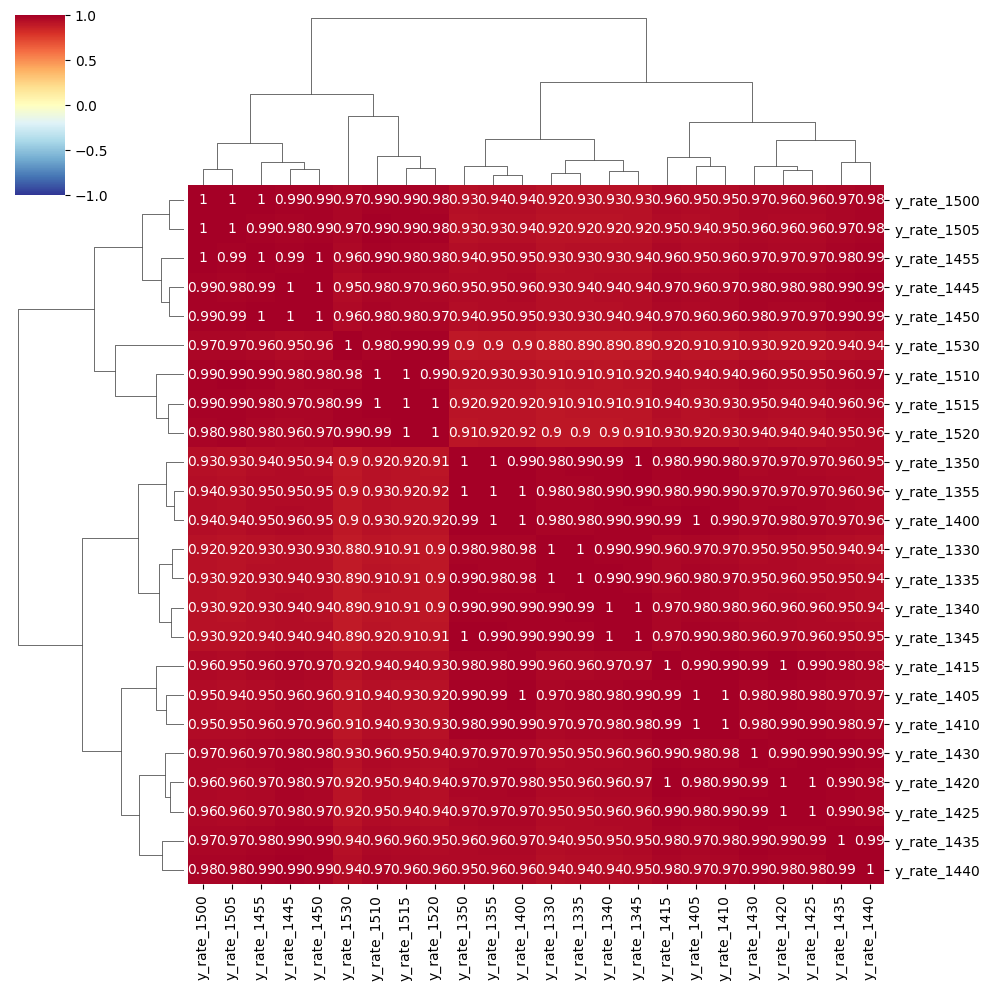

In [5]:

import seaborn as sns

df = merged_df.corr()

sns.clustermap(df, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )

In [6]:
df_1day = pd.read_csv('../data/y/X1_kodex(1d).csv',index_col=0)
# 인덱스를 DatetimeIndex로 변환
df_1day.index = pd.to_datetime(df_1day.index , format='%Y%m%d')
df_1day = df_1day[['open']]

In [7]:
df_1day = pd.merge(df_1day, merged_df, right_index=True, left_index=True, how='inner')

In [ ]:
df_1day_corona = df_1day[250:900]

<Axes: >

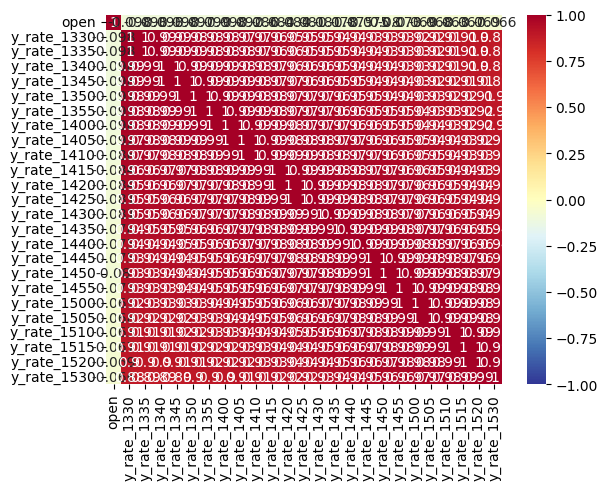

In [10]:
import seaborn as sns

df_corrr = df_1day.corr()

sns.heatmap(df_corrr, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )


In [9]:
import seaborn as sns

df = df_1day.corr()

sns.heatmap(df_corrr, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )

NameError: name 'df_1day_corona' is not defined